In [133]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [134]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import netCDF4 as nc
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import cmocean as cm
import glob
from datetime import datetime, timedelta
import datetime as dt
import pandas as pd
import pickle

import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import arrow
import gsw

## looking at the Columbia flowthrough data

    problems:
    cruise ships go fast! 20 knots/ 37 km/hr 
    sampling freq.: once every 2-3 minutes
    we very rarely sample the same box (500x500m) more than once a day
    so how do we do stats on this?
    bin by 'latitude'? (boxes in this case). let's try that!) 
    

###### read data as dataframe, get relevant variables

###### load those pickles back and now fun can start

In [2]:
decdesc_sub51 = \
pickle.load(open('./pkls/decdesc_sub51.pkl', 'rb')) 
i_sub51 = \
pickle.load(open('./pkls/i_sub51.pkl', 'rb')) 
j_sub51 = \
pickle.load(open('./pkls/j_sub51.pkl', 'rb')) 
pco2_sub51 = \
pickle.load(open('./pkls/pco2_sub51.pkl', 'rb')) 
sst_sub51 = \
pickle.load(open('./pkls/sst_sub51.pkl', 'rb')) 
lat_sub51 = \
pickle.load(open('./pkls/lat_sub51.pkl', 'rb')) 
lon_sub51 = \
pickle.load(open('./pkls/lon_sub51.pkl', 'rb')) 
dts_sub51 = \
pickle.load(open('./pkls/dts_sub51.pkl', 'rb')) 

In [143]:
mons = np.zeros_like(lon_sub51)
yrs = np.zeros_like(lon_sub51)
days = np.zeros_like(lon_sub51)
for i in range(0,len(mons)):
    
    mons[i] = dts_sub51[i].month
    yrs[i] = dts_sub51[i].year
    days[i] = dts_sub51[i].day

(1, 12717)
(63022,)


In [7]:
dt = datetime(2013, 12, 14, 5, 0, 0)
print(dt)
dt = datetime(*dt.timetuple()[:3])
print(dt)

2013-12-14 05:00:00
2013-12-14 00:00:00


In [13]:
## round datetimes to get list of dates
dts_rounded = np.zeros_like(dts_sub51)

from datetime import date,timedelta

for i in range(0,len(dts_rounded)):
    td = dts_sub51[i]
    dts_rounded[i] = datetime(*td.timetuple()[:3])
    
print(dts_rounded[0])

uniq_days = np.unique(dts_rounded)
print(np.shape(uniq_days))

2017-11-03 00:00:00
(131,)


In [14]:
# print(uniq_days)

[datetime.datetime(2017, 11, 3, 0, 0) datetime.datetime(2017, 11, 4, 0, 0)
 datetime.datetime(2017, 11, 10, 0, 0)
 datetime.datetime(2017, 11, 11, 0, 0)
 datetime.datetime(2017, 11, 17, 0, 0)
 datetime.datetime(2017, 11, 18, 0, 0)
 datetime.datetime(2017, 11, 24, 0, 0)
 datetime.datetime(2017, 11, 25, 0, 0)
 datetime.datetime(2017, 12, 1, 0, 0) datetime.datetime(2017, 12, 2, 0, 0)
 datetime.datetime(2017, 12, 8, 0, 0) datetime.datetime(2017, 12, 9, 0, 0)
 datetime.datetime(2017, 12, 15, 0, 0)
 datetime.datetime(2017, 12, 16, 0, 0)
 datetime.datetime(2017, 12, 22, 0, 0)
 datetime.datetime(2017, 12, 23, 0, 0)
 datetime.datetime(2017, 12, 29, 0, 0)
 datetime.datetime(2017, 12, 30, 0, 0) datetime.datetime(2018, 1, 5, 0, 0)
 datetime.datetime(2018, 1, 6, 0, 0) datetime.datetime(2018, 1, 12, 0, 0)
 datetime.datetime(2018, 1, 13, 0, 0) datetime.datetime(2018, 2, 2, 0, 0)
 datetime.datetime(2018, 2, 3, 0, 0) datetime.datetime(2018, 2, 9, 0, 0)
 datetime.datetime(2018, 2, 10, 0, 0) datetime.dat

Text(0.5, 1.0, 'date coverage of the columbia dataset')

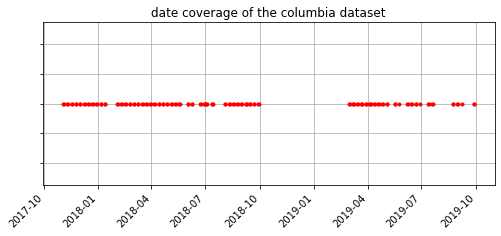

In [23]:
fact = 0.3
fig, axs = plt.subplots(1,1, figsize=(27*fact, 10*fact), facecolor='w', edgecolor='k')

for i in range(0, len(uniq_days)):
    
    axs.plot(uniq_days[i],1, color = 'red',marker = '.')

w = plt.xticks(rotation=45, ha='right')
axs.set_yticklabels([])
axs.grid()
axs.set_title('date coverage of the columbia dataset')

In [54]:
ymds = []
for i in range(0,len(uniq_days)):
    
    today = uniq_days[i]
    todays = str(today)
    boop = (todays[0:10])
    tdate = arrow.get(boop)

    ymd = tdate.format('YYYYMMDD')
    doy = tdate.format('DDD')
    yy = tdate.format('YYYY')
    mm = tdate.format('MMM').lower()
    sy = tdate.format('YY')
    dd = tdate.format('DD')
    dayfolder = f'{dd}{mm}{sy}'
    
    ymds.append(ymd)

#     print(dayfolder)
    
#     w = f'/results2/SalishSea/nowcast-green.201905/{dayfolder}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc'
#     w2 = glob.glob(w); gridT = nc.Dataset(w2[0])
#     temp = gridT['votemper'][:,0,:,:]
#     sal = gridT['vosaline'][:,0,:,:]
    
#     w = f'/results2/SalishSea/nowcast-green.201905/{dayfolder}/SalishSea_1h_{ymd}_{ymd}_carp_T.nc'
#     w2 = glob.glob(w); carpT = nc.Dataset(w2[0])
#     DIC = carpT['dissolved_inorganic_carbon'][:,0,:,:]
#     TA = carpT['total_alkalinity'][:,0,:,:]

#     sal_r = np.ravel(sal)
#     temp_r = np.ravel(temp)
#     tzero = np.zeros_like(sal_r)
#     DIC_r = np.ravel(DIC)
#     TA_r = np.ravel(TA)
#     tpressure = tzero+1
#     tsra_psu = sal_r*35/35.16504
#     ttera_is = gsw.t_from_CT(sal_r,temp_r,tzero)

#     response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=TA_r*1e-3, dic=DIC_r*1e-3, 
#                        sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
#                         optcon='mol/m3', optt='Tinsitu', optp='m',
#                         optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
#     pH,pco2_mod,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

#     pco2_mod_r = pco2_mod.reshape(24,898,398)
#     daily_pco2 = np.nanmean(pco2_mod_r, axis = 0)
#     fluxnam = f'./pkls/pco2_{ymd}.pkl'
#    pickle.dump(daily_pco2, open(fluxnam, 'wb'))


In [56]:
print(ymds)

['20171103', '20171104', '20171110', '20171111', '20171117', '20171118', '20171124', '20171125', '20171201', '20171202', '20171208', '20171209', '20171215', '20171216', '20171222', '20171223', '20171229', '20171230', '20180105', '20180106', '20180112', '20180113', '20180202', '20180203', '20180209', '20180210', '20180216', '20180217', '20180223', '20180224', '20180302', '20180303', '20180309', '20180310', '20180316', '20180317', '20180323', '20180324', '20180330', '20180331', '20180406', '20180407', '20180413', '20180414', '20180420', '20180421', '20180427', '20180428', '20180504', '20180505', '20180511', '20180512', '20180518', '20180519', '20180601', '20180602', '20180608', '20180609', '20180622', '20180623', '20180629', '20180630', '20180701', '20180702', '20180703', '20180712', '20180713', '20180714', '20180803', '20180804', '20180810', '20180811', '20180817', '20180818', '20180824', '20180825', '20180831', '20180901', '20180907', '20180908', '20180909', '20180914', '20180915', '20

In [81]:
%time
pco2_mod = np.zeros_like(pco2_sub51)

for u in range(0,len(uniq_days)):
    
    ymd = ymds[u]
    print(ymd)
    fluxnam = f'./pkls/pco2_{ymd}.pkl'
    tpco2 = pickle.load(open(fluxnam, 'rb'))
    
    today = uniq_days[u]
    
    where_td = np.where(dts_rounded == today)
    sset = dts_rounded[where_td]
    print(np.shape(where_td))
    where_td = np.squeeze(where_td)
    if np.size(where_td) >1:
        for i in range(0, len(where_td)):
            tind = where_td[i]
            ti = i_sub51[tind]; tj = j_sub51[tind]
            pco2_mod[tind] = tpco2[int(tj),int(ti)]
#     print(np.shape(sset))
#     print(where_td[0:10])



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.6 µs
20171103
(1, 463)
20171104
(1, 420)
20171110
(1, 453)
20171111
(1, 383)
20171117
(1, 639)
20171118
(1, 417)
20171124
(1, 630)
20171125
(1, 404)
20171201
(1, 588)
20171202
(1, 401)
20171208
(1, 603)
20171209
(1, 404)
20171215
(1, 542)
20171216
(1, 401)
20171222
(1, 631)
20171223
(1, 402)
20171229
(1, 641)
20171230
(1, 428)
20180105
(1, 660)
20180106
(1, 399)
20180112
(1, 610)
20180113
(1, 409)
20180202
(1, 166)
20180203
(1, 470)
20180209
(1, 606)
20180210
(1, 431)
20180216
(1, 648)
20180217
(1, 461)
20180223
(1, 616)
20180224
(1, 416)
20180302
(1, 588)
20180303
(1, 441)
20180309
(1, 588)
20180310
(1, 409)
20180316
(1, 624)
20180317
(1, 443)
20180323
(1, 649)
20180324
(1, 390)
20180330
(1, 650)
20180331
(1, 418)
20180406
(1, 637)
20180407
(1, 375)
20180413
(1, 642)
20180414
(1, 426)
20180420
(1, 584)
20180421
(1, 385)
20180427
(1, 643)
20180428
(1, 393)
20180504
(1, 644)
20180505
(1, 377)
20180511
(1, 630)
20180512
(1, 424)


In [88]:
pco2_mod[pco2_mod>1e19] = np.nan
pickle.dump(pco2_mod, open("./pkls/pco2_mod.pkl", 'wb'))

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(array([1.0000e+00, 1.3000e+03, 1.8699e+04, 8.3940e+03, 3.9520e+03,
        8.8050e+03, 1.0306e+04, 6.6130e+03, 4.0650e+03, 6.0400e+02]),
 array([  0.        ,  82.24408956, 164.48817911, 246.73226867,
        328.97635822, 411.22044778, 493.46453734, 575.70862689,
        657.95271645, 740.19680601, 822.44089556]),
 <BarContainer object of 10 artists>)

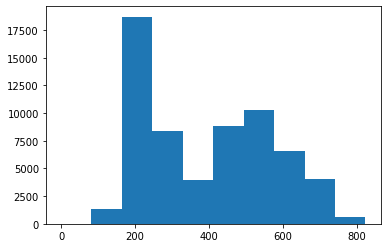

In [87]:
plt.hist(pco2_mod[pco2_mod<1e19])